# newremagine.core

> The module's core functionality

# About core

This submodule contains the core functionality we are interested in. There are `train()` and `test()` functions, as well as some helper functions for visualization.

If you want to run `newremagine` experiments, this is the place to start.

# Usage

In the following cells we download some data, train on it, and plot how the model did, and then test it.

### Imports

In [1]:
from newremagine.core import train
from newremagine.core import test
from newremagine.core import classify
from newremagine.core import plot_test
from newremagine.core import plot_latent

from torchvision import datasets, transforms
from torchvision.datasets import MNIST
from torchvision.datasets import FashionMNIST

### Data

In [2]:
train_dataset = MNIST(
    "data/", download=True, train=True, transform=transforms.ToTensor()
)
test_dataset = MNIST(
    "data/", train=False, transform=transforms.ToTensor()
)

### Train

In [11]:
fraction = [0.8, 0.1, 0.1]  # <--- play with this
model, memory, loss = train(
    fraction,
    train_dataset,
    num_episodes=2000,       # <--- play with this
    batch_size=8,
    num_burn=50,            # <--- is this sensible?
    lr=0.001,
    perfect=True,
)

print(f"Final VAE training loss : {loss}")

Final VAE training loss : 1052.3187255859375


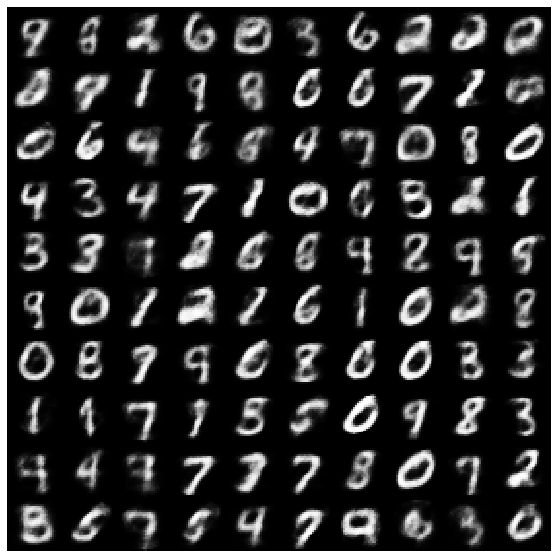

In [4]:
plot_test(model, train_dataset, 10)

## Classify
Use the self-supervised model from train() to make a supervised classifier. This is more practical test than just the raw loss, perhaps. (We cheat and use the same data, as an example. Probably don't do this.)

In [9]:
linear, loss, accuracy = classify(model, train_dataset, num_episodes=2000, lr=0.001)
print(f"Final classifier scores - loss: {loss}, accuracy {accuracy}")

Final classifier scores - loss: 0.007031890098005533, accuracy 1.0


## Test
Of course final generalization must be measured on some held-out test data. (Don't do this until you are done fiddling with paramters during training)

In [14]:
test_loss = test(model, test_dataset)
print(f"Average VAE test loss : {test_loss/len(test_dataset)}")

Average VAE test loss : 147.1341512413025


# Reference

## train

> Given a fraction and dataset, train to self-supervised model

In [ ]:
print(train.__doc__)

## test

> Test a pre-trained model on a new dataset.

In [ ]:
print(test.__doc__)

## plot_test

> Display a grid random samples from the test data.

In [ ]:
print(plot_test.__doc__)

## plot_latent

> Display a grid of samples from the latent space.

In [ ]:
print(plot_latent.__doc__)